In [ ]:
# Customer_Segmentation
# Author: Avisheka Guha Niyogi

In [2]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from plotnine import 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the Data

df=pd.read_excel(r"C:\Users\hp\LearnBayAIML\PythonCodes\Projects\CustomerSegmentation\customersegmentation.xlsx")

In [ ]:
######## Explanations ###################
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [17]:
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [18]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# As seen CREDIT_LIMIT and MINIMUM_PAYMENTS have missing values

In [5]:
# NAN values in CREDIT_LIMIT is less than 10 rows. Therefore it can be dropped

dfnew = df.dropna(subset=['CREDIT_LIMIT'])
dfnew.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# To impute NAN values in MINIMUM_PAYMENTS we need to first check the central tendencies to see if dataset is skewed

med=dfnew['MINIMUM_PAYMENTS'].median()

med

312.4522915

In [7]:
dfnew['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [8]:
# Theres huge difference between mean and median proving that there are many outliers So we shall fill the NAN values with median

dfnew['MINIMUM_PAYMENTS'].fillna(med, inplace = True)

dfnew.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.452292          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [8]:
dfnew.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449436   
std                  0.200132          6.824987      24.858552   3638.815790   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8949.000000       8949.000000  8949.000000  
mean    1733.336511        845.003358          0.153732    11.517935  
std     2895.168146       2332.905284          0.292511     1.337134  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.282850        170.875613          0.000000    12.000000  
50%      857.062706        312.452292          0.000000    12.000000  
75%     1901.279320        788.721609          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
# Extracting numerical features

features_num=[i for i in dfnew.columns if dfnew.dtypes[i] != 'O']

# Extracting categorical  features

features_cat=[i for i in dfnew.columns if dfnew.dtypes[i] == 'O']

In [19]:
features_cat

['CUST_ID']

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>,
        <AxesSubplot:title={'center':'TENURE'}>,

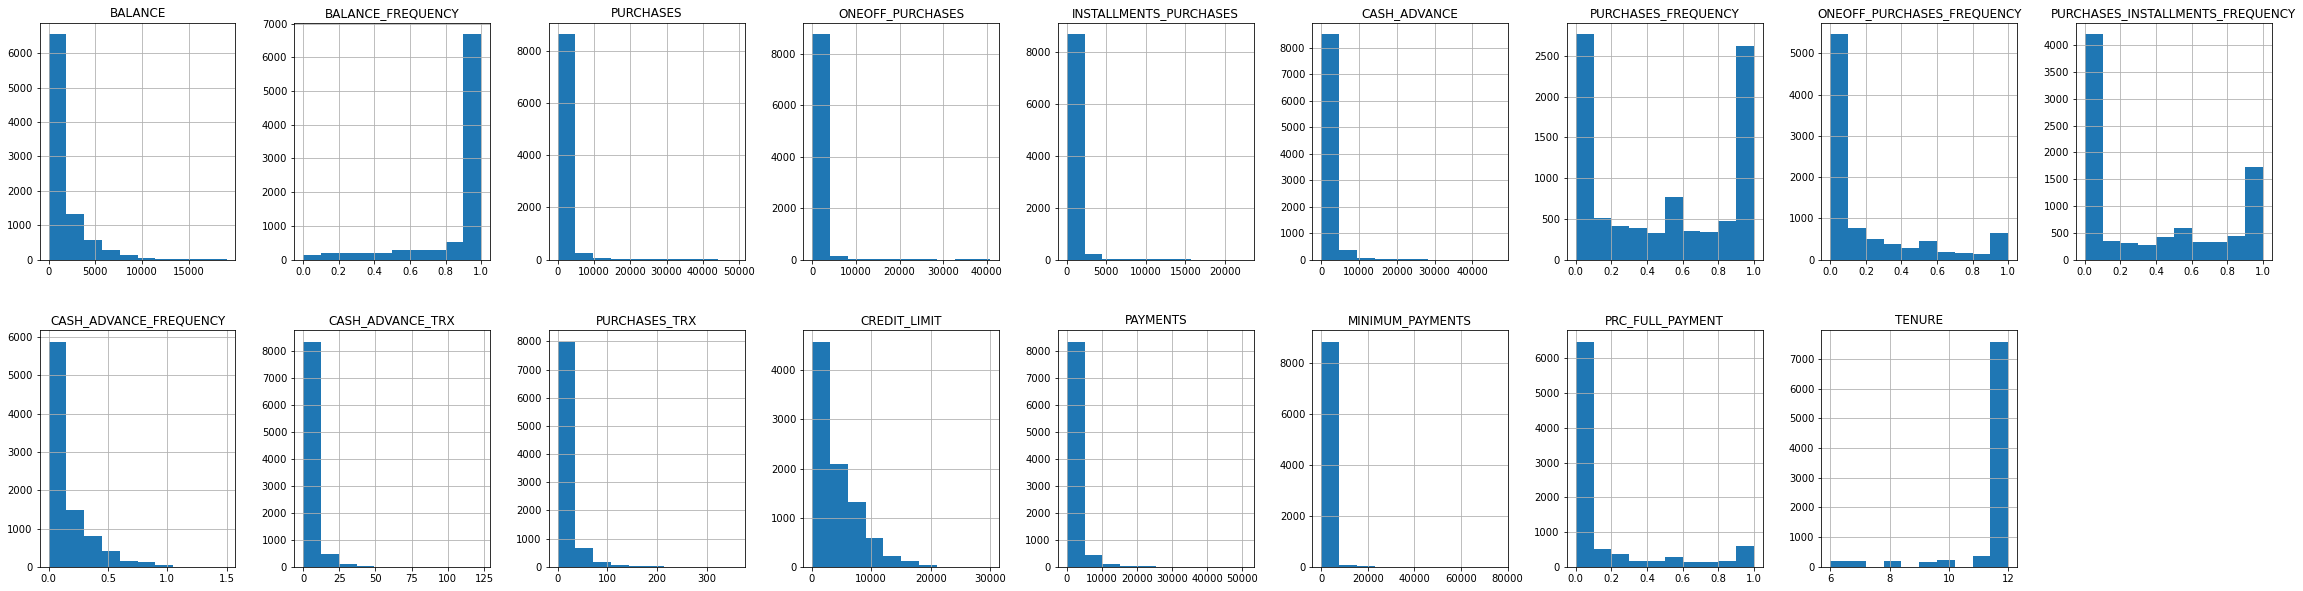

In [42]:
dfnew.hist(layout=(2,9), figsize=(40,10))

In [ ]:
# All variables have a range of values (no constant)
# Purchases and Payments seem quite similar. Should be checked with correlation analysis

In [49]:
# Max ONEOFFPURCHASES done by a user

dfnew[dfnew.ONEOFF_PURCHASES==dfnew.ONEOFF_PURCHASES.max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [10]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
dfnew[dfnew.CASH_ADVANCE==dfnew.CASH_ADVANCE.max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

In [11]:
dfnew.loc[(dfnew['PURCHASES'] >= 0) & (dfnew['PURCHASES'] <= 10000), 'Purchases_Bucket'] = 'B1'
dfnew.loc[(dfnew['PURCHASES'] > 10000) & (dfnew['PURCHASES'] <= 20000), 'Purchases_Bucket'] = 'B2'
dfnew.loc[(dfnew['PURCHASES'] > 20000) & (dfnew['PURCHASES'] <= 30000), 'Purchases_Bucket'] = 'B3'
dfnew.loc[(dfnew['PURCHASES'] > 30000) & (dfnew['PURCHASES'] <= 40000), 'Purchases_Bucket'] = 'B4'
dfnew.loc[(dfnew['PURCHASES'] > 40000) & (dfnew['PURCHASES'] <= 50000), 'Purchases_Bucket'] = 'B5'

In [12]:
dfnew.groupby(['Purchases_Bucket']).count()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  \
Purchases_Bucket                                                   
B1                   8879     8879               8879       8879   
B2                     48       48                 48         48   
B3                     15       15                 15         15   
B4                      4        4                  4          4   
B5                      3        3                  3          3   

                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Purchases_Bucket                                                           
B1                            8879                    8879          8879   
B2                              48                      48            48   
B3                              15                      15            15   
B4                               4                       4             4   
B5                               3                       3             3   

                  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Purchases_Bucket                                                    
B1                               8879                        8879   
B2                                 48                          48   
B3                                 15                          15   
B4                                  4                           4   
B5                                  3                           3   

                  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Purchases_Bucket                                                             
B1                                            8879                    8879   
B2                                              48                      48   
B3                                              15                      15   
B4                                               4                       4   
B5                                               3                       3   

                  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
Purchases_Bucket                                                            
B1                            8879           8879          8879      8879   
B2                              48             48            48        48   
B3                              15             15            15        15   
B4                               4              4             4         4   
B5                               3              3             3         3   

                  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
Purchases_Bucket                                              
B1                            8879              8879    8879  
B2                              48                48      48  
B3                              15                15      15  
B4                               4                 4       4  
B5                               3                 3       3

In [ ]:
#This above table shows more purchases happen between amount range of 0 to 10000

<AxesSubplot:xlabel='PURCHASES', ylabel='CREDIT_LIMIT'>

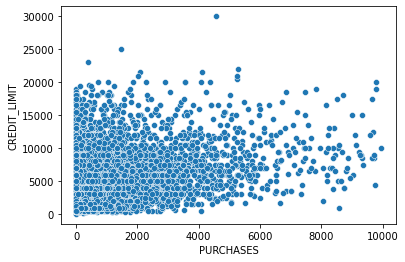

In [13]:
# Check credit card limit along with B1 bucket purchases

dfb1=dfnew.loc[(dfnew['Purchases_Bucket'] == 'B1'),:]

sns.scatterplot(x="PURCHASES",y="CREDIT_LIMIT",data=dfb1)


<AxesSubplot:xlabel='PURCHASES', ylabel='PURCHASES_FREQUENCY'>

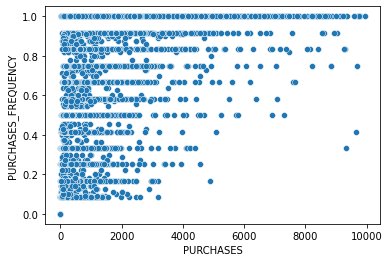

In [30]:
# Check PURCHASES_FREQUENCY limit along with B1 bucket purchases
sns.scatterplot(x="PURCHASES",y="PURCHASES_FREQUENCY",data=dfb1)


<AxesSubplot:xlabel='PURCHASES', ylabel='BALANCE'>

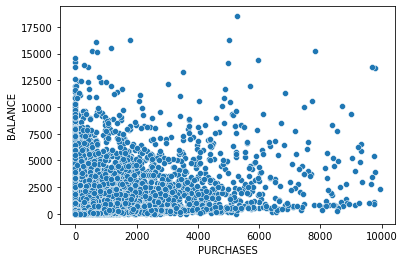

In [31]:
# Check BALANCE limit along with B1 bucket purchases
sns.scatterplot(x="PURCHASES",y="BALANCE",data=dfb1)

In [ ]:
# Low Balance people used credit card more.

<AxesSubplot:xlabel='PURCHASES', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

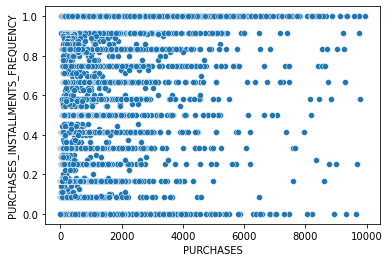

In [38]:
# Check PURCHASES_INSTALLMENTS_FREQUENCY along with B1 bucket purchases
sns.scatterplot(x="PURCHASES",y="PURCHASES_INSTALLMENTS_FREQUENCY",data=dfb1)

<AxesSubplot:xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES_FREQUENCY'>

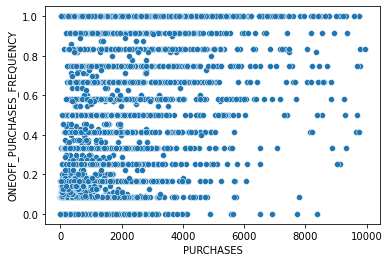

In [39]:
# Check ONEOFF_PURCHASES_FREQUENCY along with B1 bucket purchases
sns.scatterplot(x="PURCHASES",y="ONEOFF_PURCHASES_FREQUENCY",data=dfb1)

<AxesSubplot:xlabel='PURCHASES', ylabel='CASH_ADVANCE'>

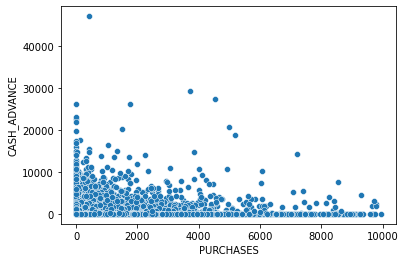

In [40]:
# Check CASH_ADVANCEalong with B1 bucket purchases
sns.scatterplot(x="PURCHASES",y="CASH_ADVANCE",data=dfb1)

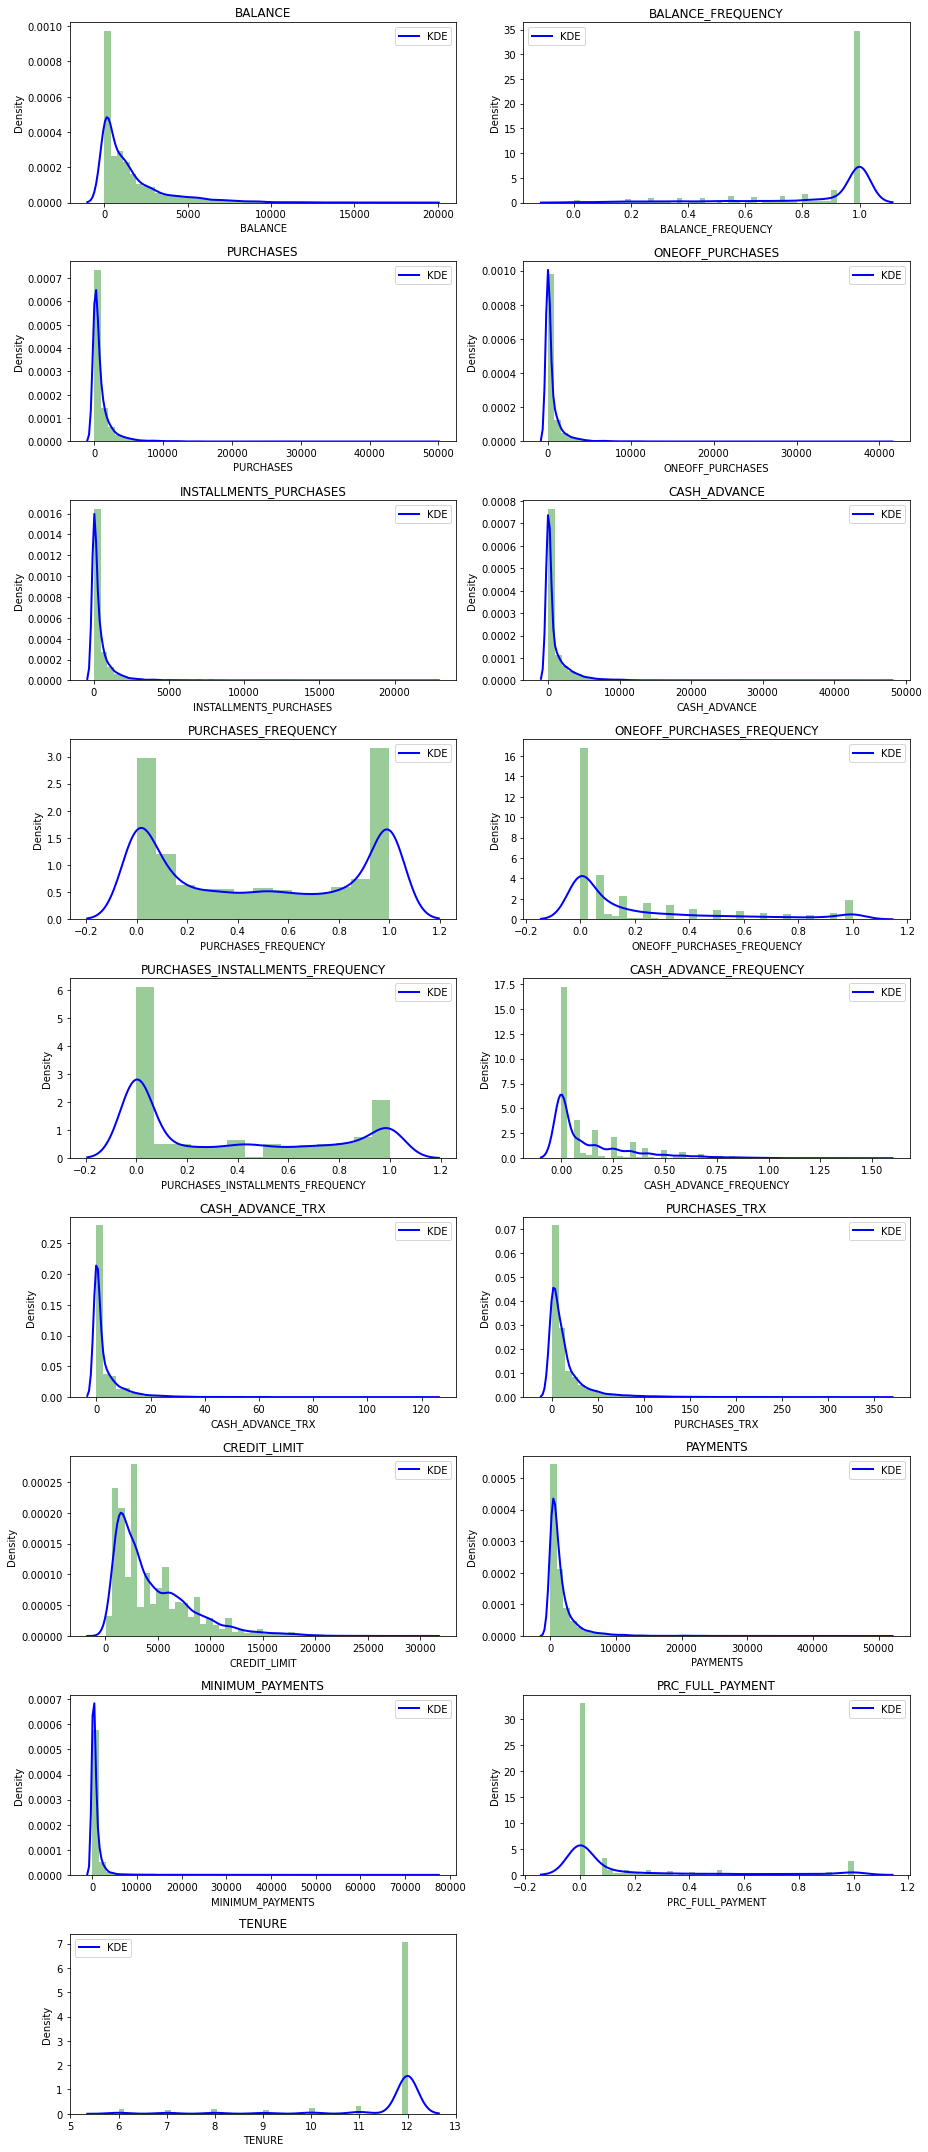

In [15]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable.
pltdf=dfnew
# pltdf.drop(['CUST_ID','Purchases_Bucket'],axis=1,inplace=True)

plt.figure(figsize=(13,30))
for i in range(len(pltdf.columns)):
        plt.subplot(len(pltdf.columns)//2+1,2,i+1)
        sns.distplot(pltdf[pltdf.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
        plt.title(pltdf.columns[i])
        plt.legend()
        plt.tight_layout()

# pltdf

In [16]:
# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

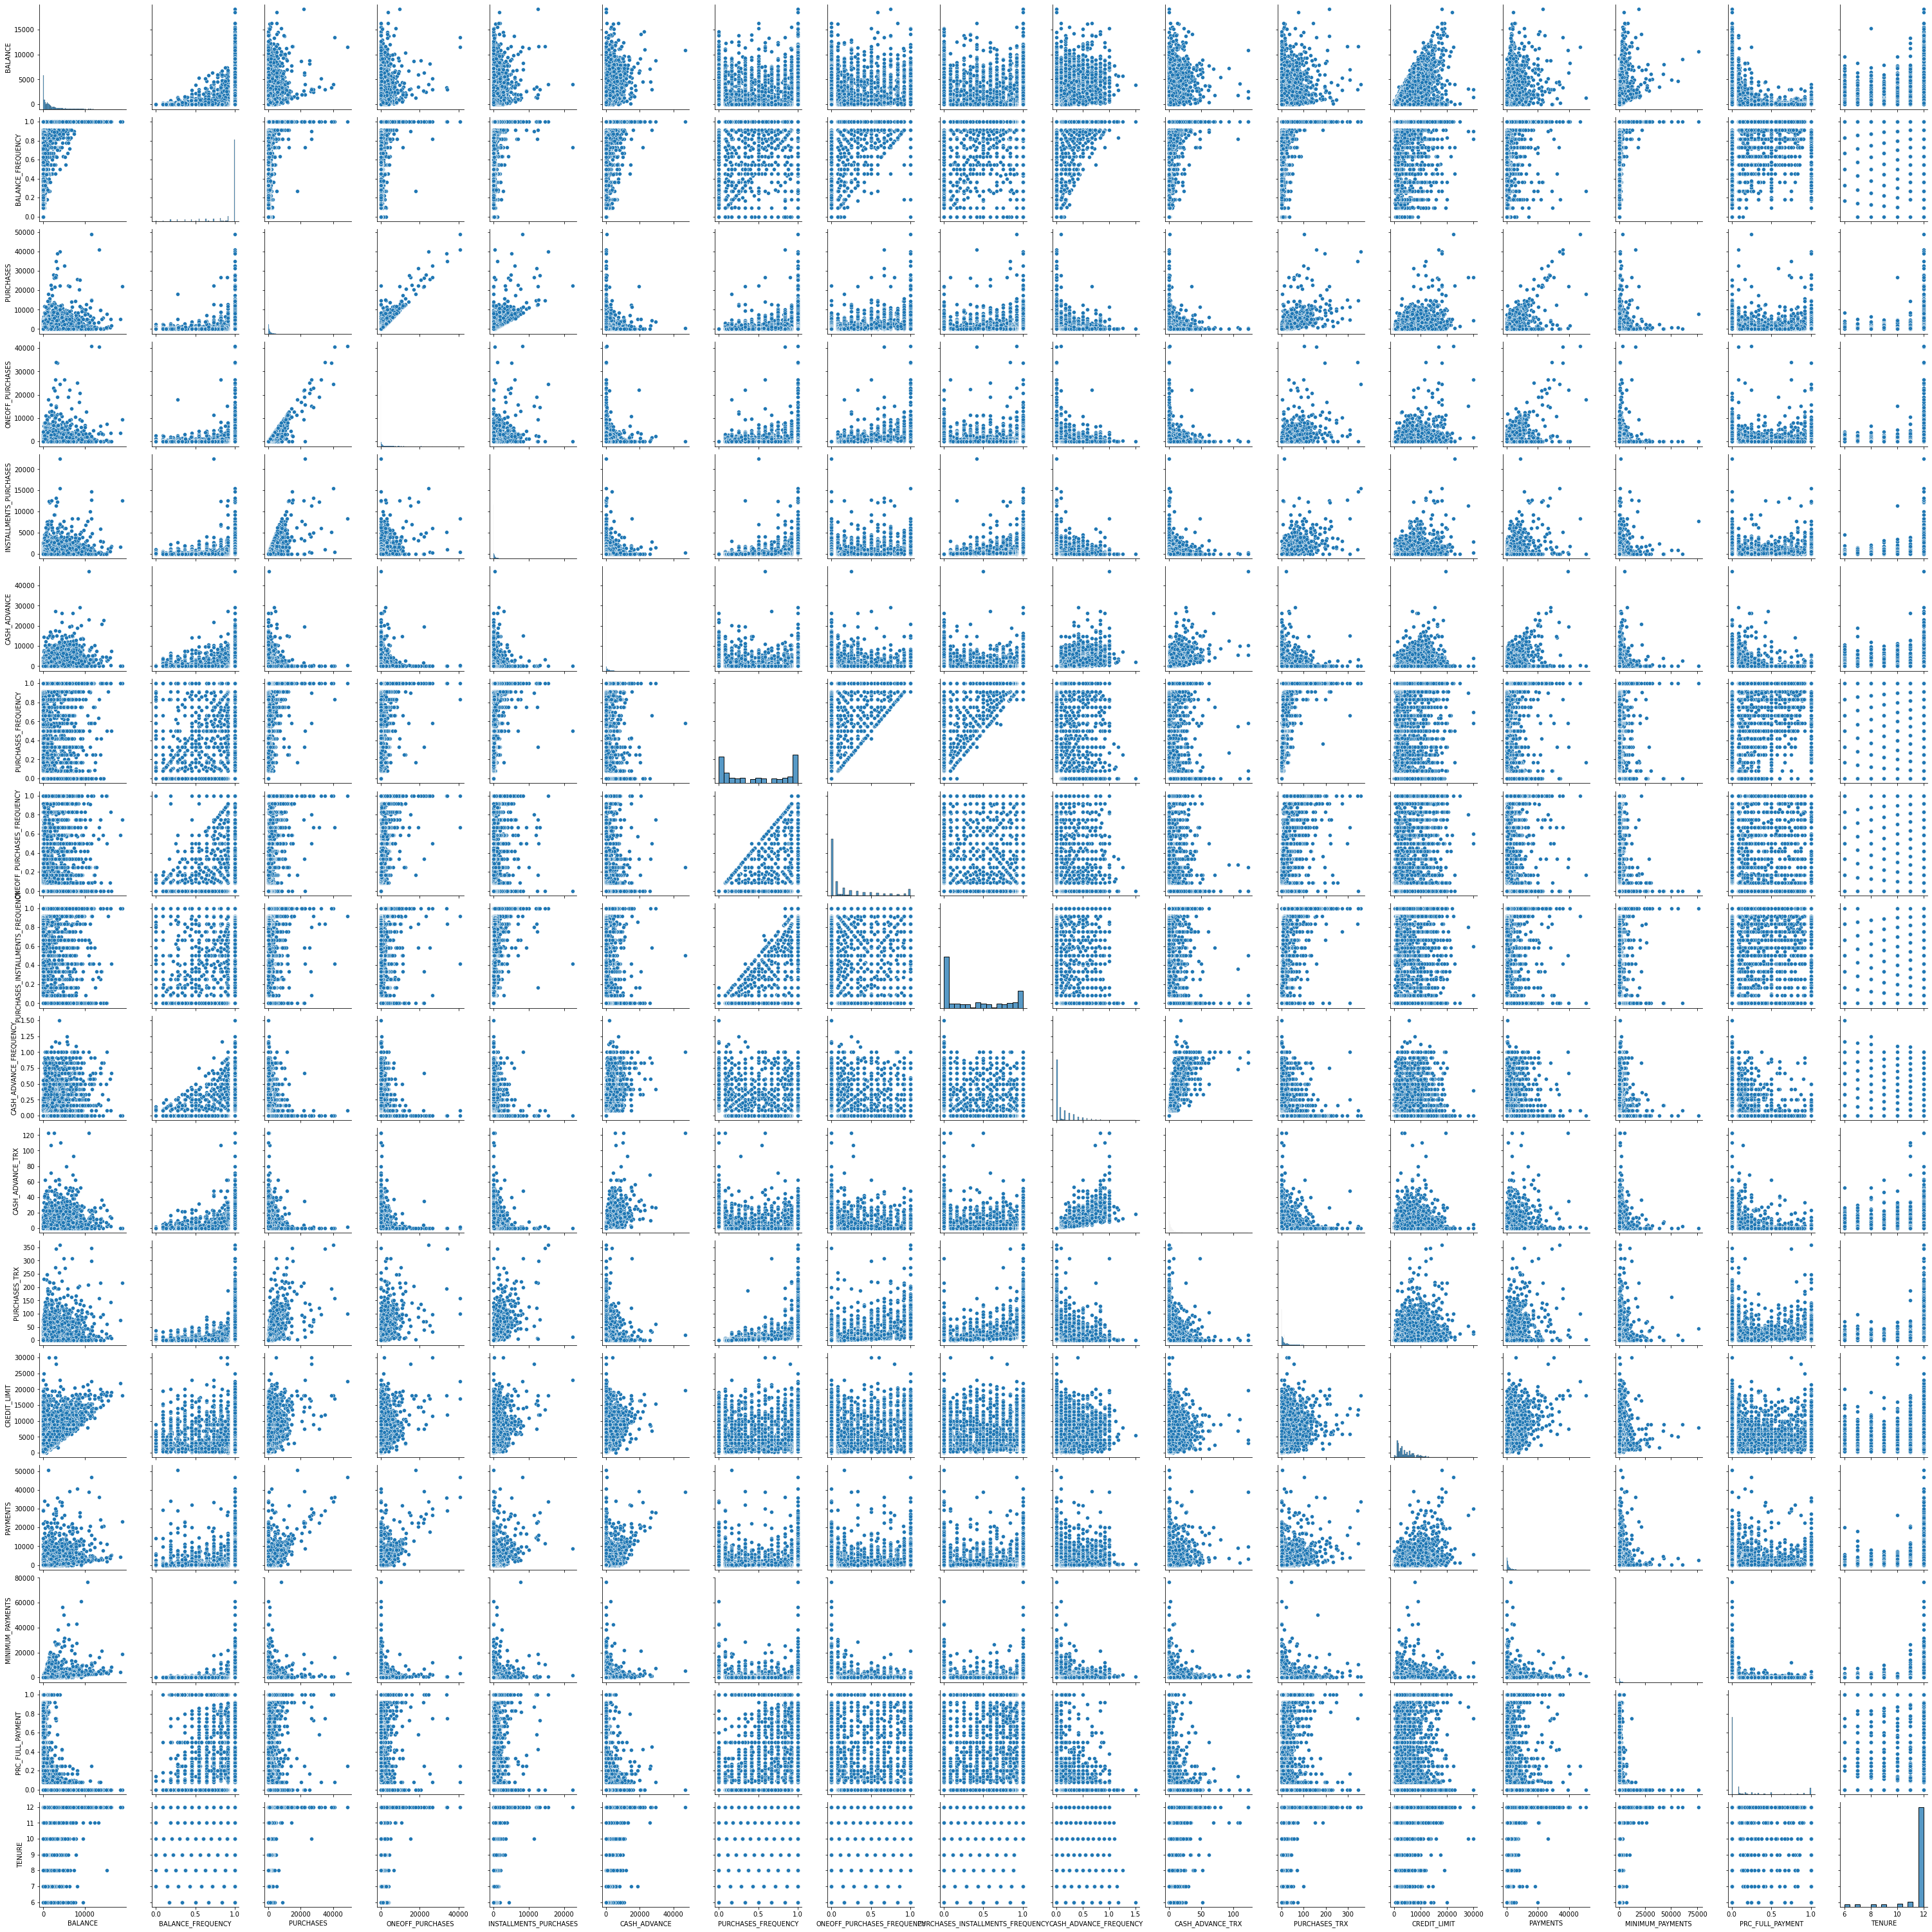

In [53]:
sns.pairplot(dfnew)

In [17]:
# Correlation Matrix

cm=dfnew.corr()
cm

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322335   0.181230   
BALANCE_FREQUENCY                 0.322335           1.000000   0.133586   
PURCHASES                         0.181230           0.133586   1.000000   
ONEOFF_PURCHASES                  0.164326           0.104257   0.916844   
INSTALLMENTS_PURCHASES            0.126437           0.124204   0.679889   
CASH_ADVANCE                      0.496679           0.099312  -0.051495   
PURCHASES_FREQUENCY              -0.078054           0.229440   0.392991   
ONEOFF_PURCHASES_FREQUENCY        0.073114           0.202295   0.498413   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063267           0.175869   0.315537   
CASH_ADVANCE_FREQUENCY            0.449246           0.192022  -0.120137   
CASH_ADVANCE_TRX                  0.385139           0.141516  -0.067194   
PURCHASES_TRX                     0.154297           0.189527   0.689552   
CREDIT_LIMIT                      0.531283           0.095843   0.356963   
PAYMENTS                          0.322769           0.064842   0.603252   
MINIMUM_PAYMENTS                  0.397905           0.131125   0.095772   
PRC_FULL_PAYMENT                 -0.319018          -0.095308   0.180356   
TENURE                            0.072421           0.118566   0.086155   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164326                0.126437   
BALANCE_FREQUENCY                         0.104257                0.124204   
PURCHASES                                 0.916844                0.679889   
ONEOFF_PURCHASES                          1.000000                0.330610   
INSTALLMENTS_PURCHASES                    0.330610                1.000000   
CASH_ADVANCE                             -0.031341               -0.064264   
PURCHASES_FREQUENCY                       0.264913                0.442398   
ONEOFF_PURCHASES_FREQUENCY                0.524881                0.214016   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127699                0.511334   
CASH_ADVANCE_FREQUENCY                   -0.082622               -0.132312   
CASH_ADVANCE_TRX                         -0.046226               -0.074017   
PURCHASES_TRX                             0.545514                0.628097   
CREDIT_LIMIT                              0.319724                0.256499   
PAYMENTS                                  0.567283                0.384066   
MINIMUM_PAYMENTS                          0.050242                0.134003   
PRC_FULL_PAYMENT                          0.132745                0.182548   
TENURE                                    0.064047                0.086016   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496679            -0.078054   
BALANCE_FREQUENCY                     0.099312             0.229440   
PURCHASES                            -0.051495             0.392991   
ONEOFF_PURCHASES                     -0.031341             0.264913   
INSTALLMENTS_PURCHASES               -0.064264             0.442398   
CASH_ADVANCE                          1.000000            -0.215579   
PURCHASES_FREQUENCY                  -0.215579             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086786             0.501305   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177118             0.862921   
CASH_ADVANCE_FREQUENCY                0.628535            -0.308483   
CASH_ADVANCE_TRX                      0.656493            -0.203541   
PURCHASES_TRX                        -0.075877             0.568408   
CREDIT_LIMIT                          0.303985             0.119788   
PAYMENTS                              0.453226             0.103393   
MINIMUM_PAYMENTS                      0.140734             0.006105   
PRC_FULL_PAYMENT                     -0.152961             0.305761   
TENURE                               -0.068552        

<AxesSubplot:>

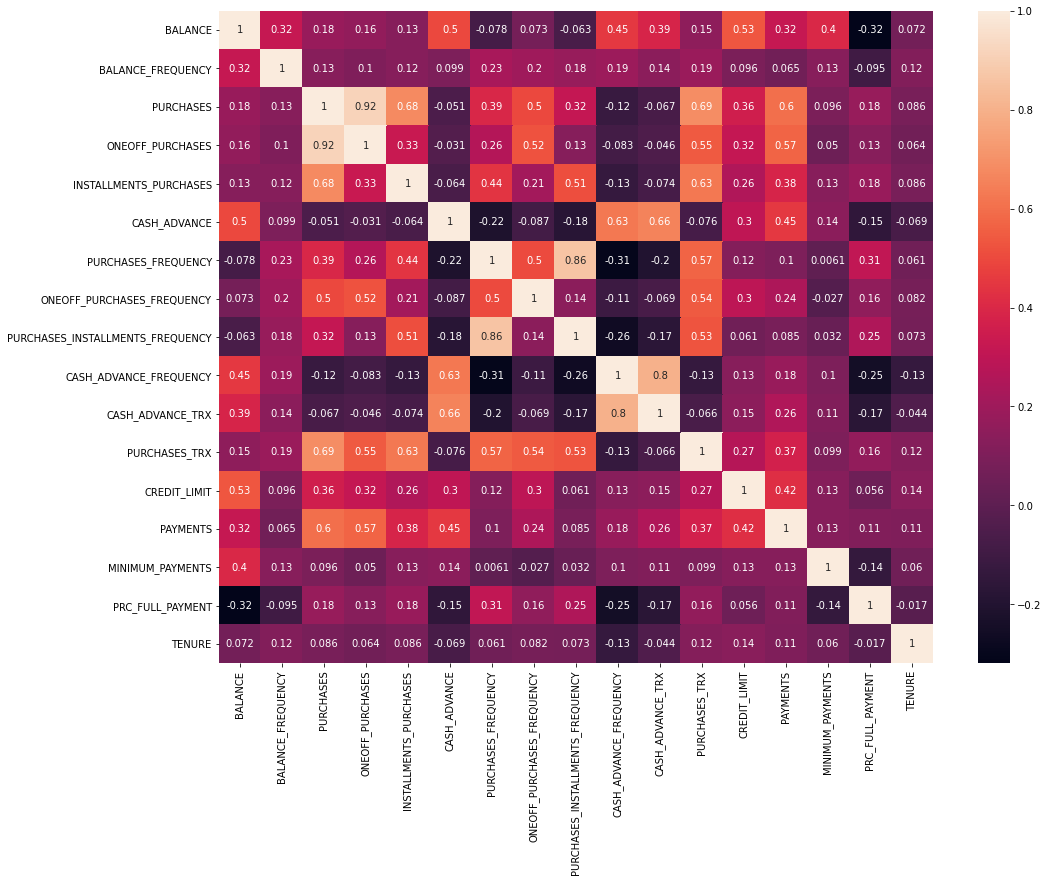

In [18]:
# HeatMap to represent Correlation Matrix

plt.figure(figsize = (16,12))
sns.heatmap(cm, annot=True)

In [19]:
# Getting Highly correlated features(Correlation above 80%)

# # Function to find highly correlated features:

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

#Getting features which 80% correlated

correlation(dfnew,0.80)

{'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}

### Model Building

In [20]:
# K Means Clustering
# Get best number of clusters using Elbow Method

# Let's scale the data first
scaler = StandardScaler()
normalized_df = scaler.fit_transform(pltdf)
normalized_df

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.30242676,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.0974534 ,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.09333029,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.32690037,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.33832999,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.3243838 ,
        -0.52558844, -4.12691899]])

In [61]:
normalized_df.shape

(8949, 17)

In [21]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_df)
  wcss_values.append(kmeans.inertia_)

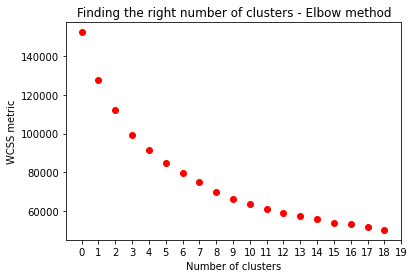

In [22]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()


# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Lets take 7 as the no. of clusters.

In [23]:
kmeans=KMeans(8)
kmeans.fit(normalized_df)
kmeans.cluster_centers_.shape

# We have 8 centroids with 17 coordinates corresponding to each features of the dataset

(8, 17)

In [24]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[pltdf.columns])

In [26]:
labels = kmeans.labels_
labels

array([1, 6, 7, ..., 3, 3, 3])

In [27]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [28]:
# concatenate the clusters labels to our original dataframe
df_with_centroids = pd.concat([pltdf, pd.DataFrame({'centroid':labels})], axis=1)
df_with_centroids  

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  centroid  
0      201.802084        139.509787          0.000000    12.0       1.0  
1     4103.032597       1072.340217          0.222222    12.0       6.0  
2      622.066742        627.284787          0.000000    12.0       7.0  
3        0.000000        312.452292          0.000000    12.0       1.0  
4      678.334763        244.791237          0.000000    12.0       1.0  
...           ...               ...               ...     ...       ...  
8945   325.594462         48.886365          0.500000     6.0       

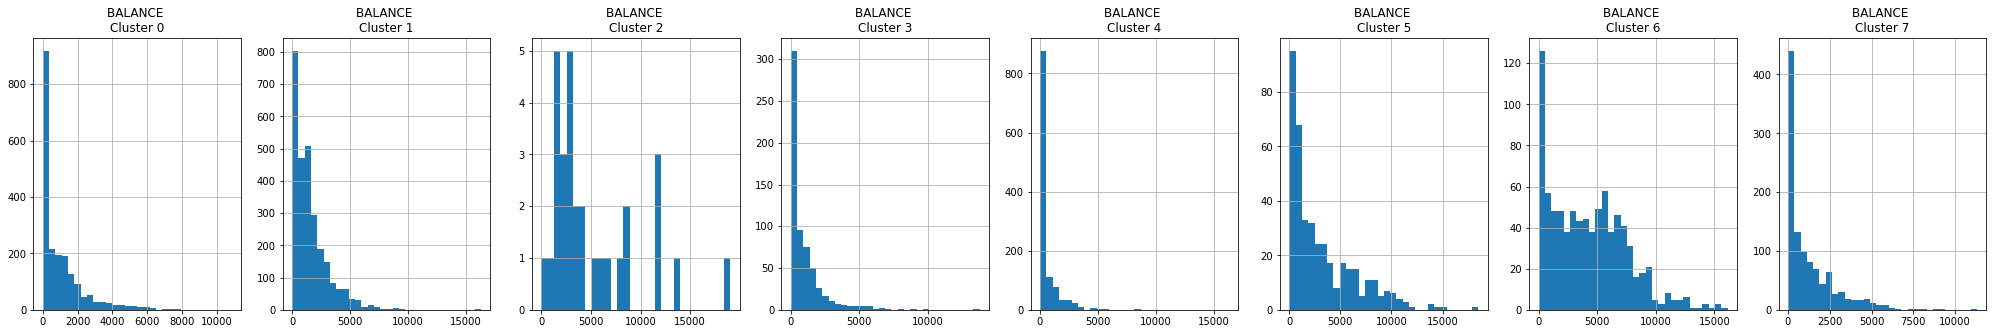

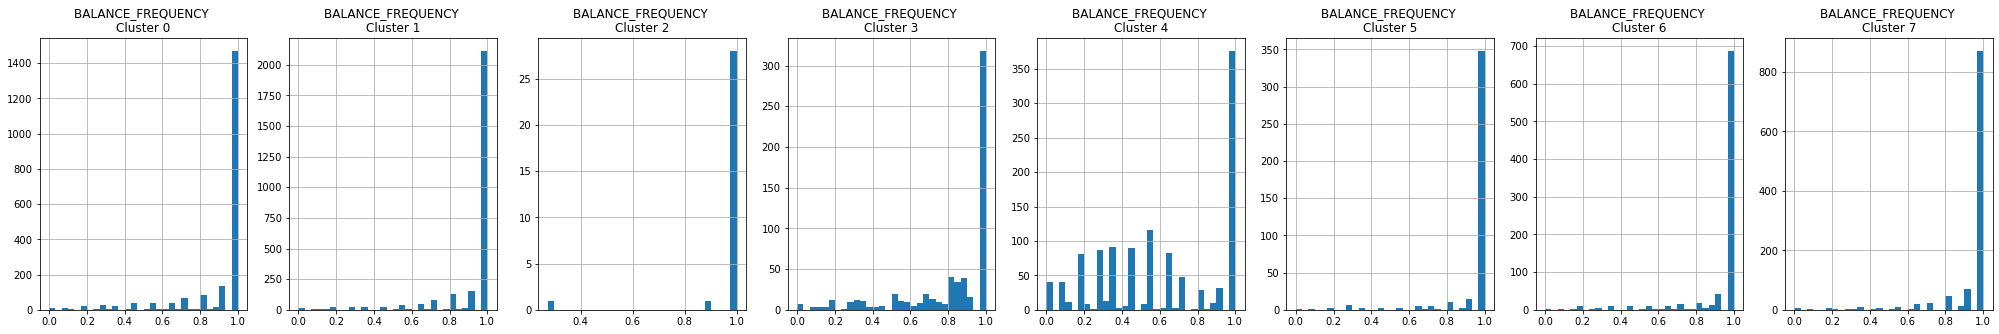

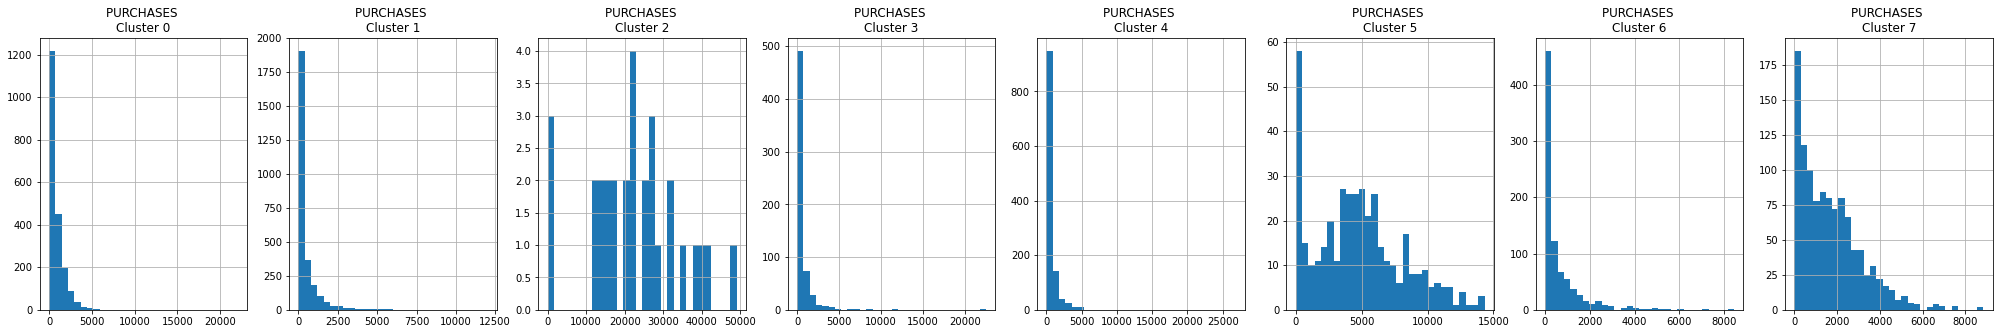

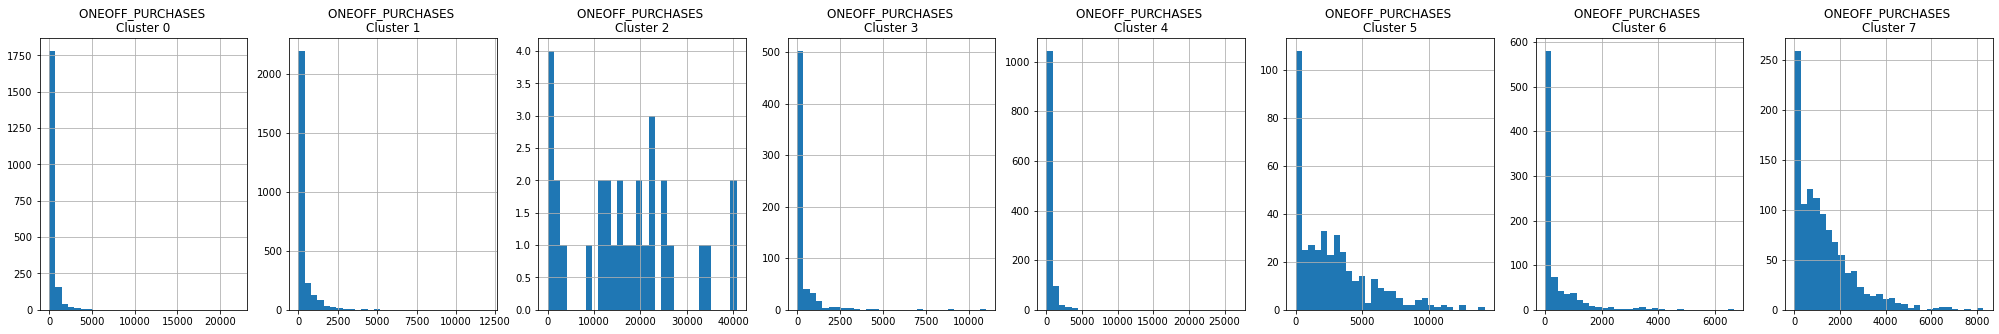

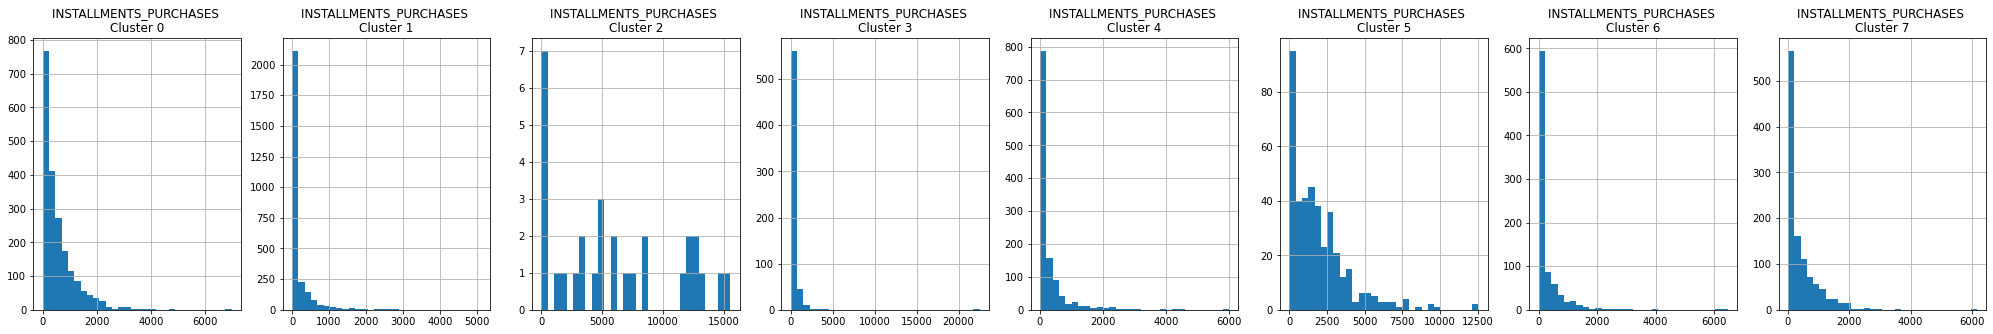

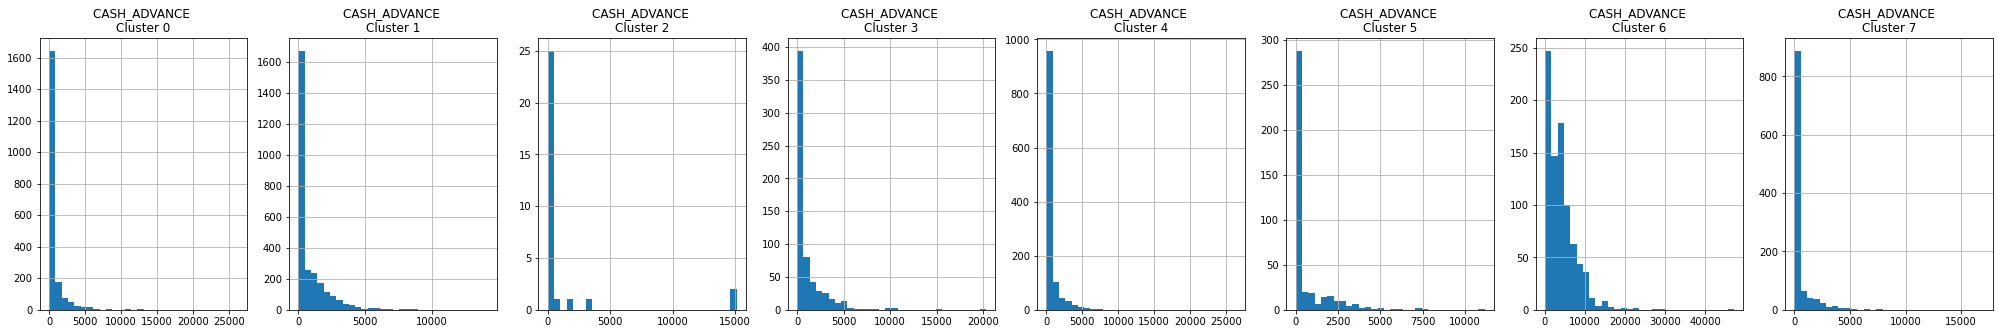

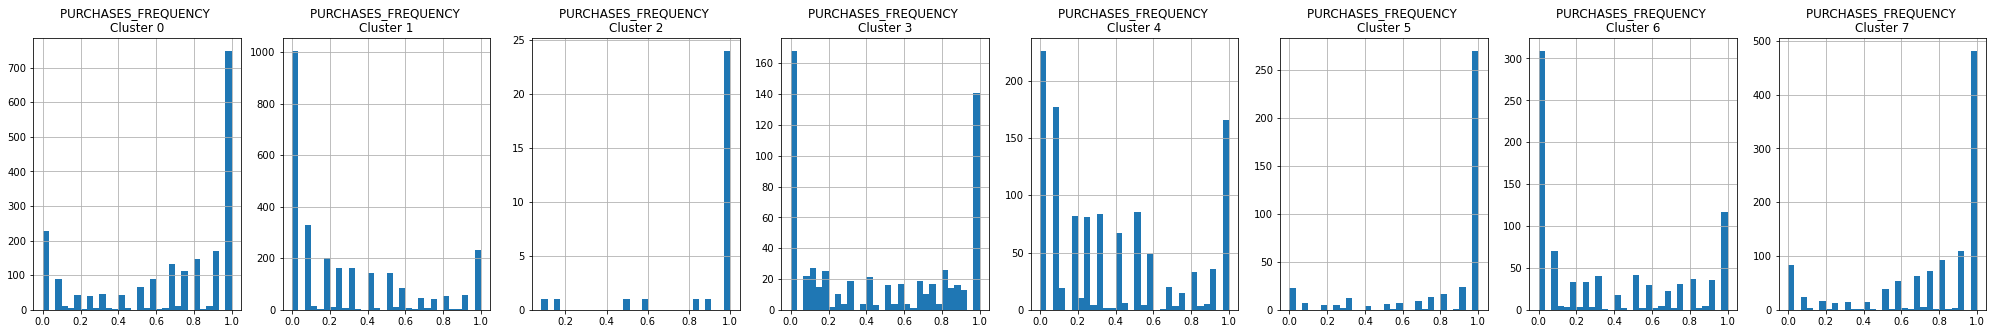

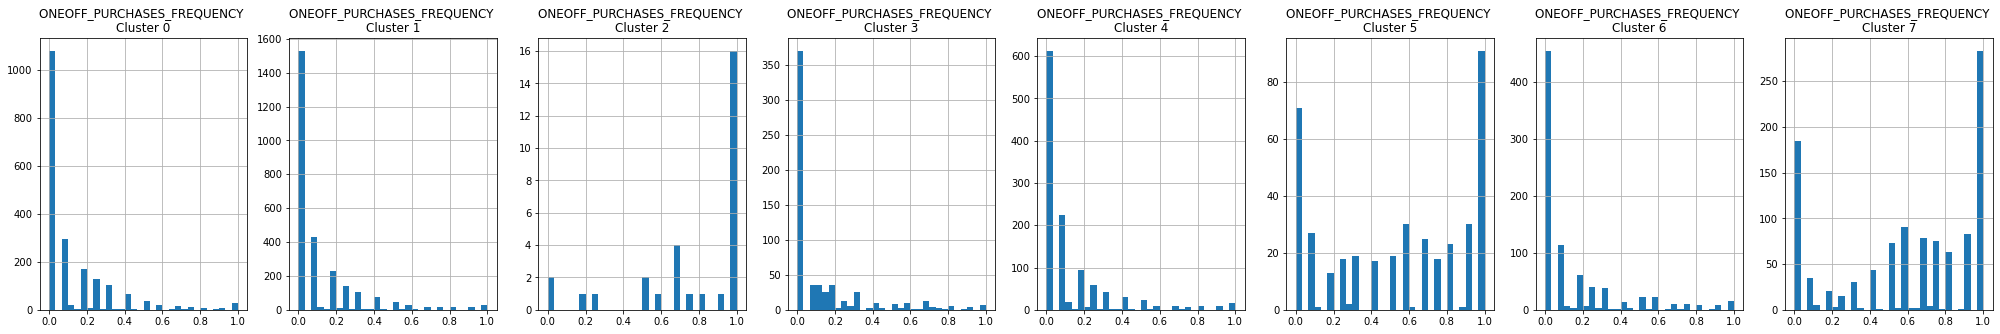

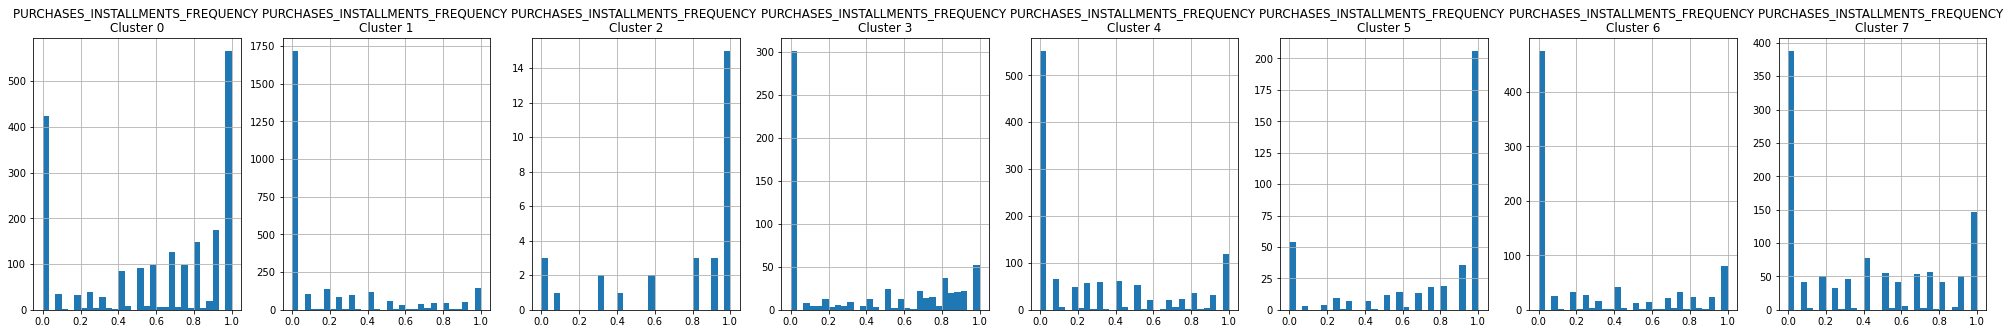

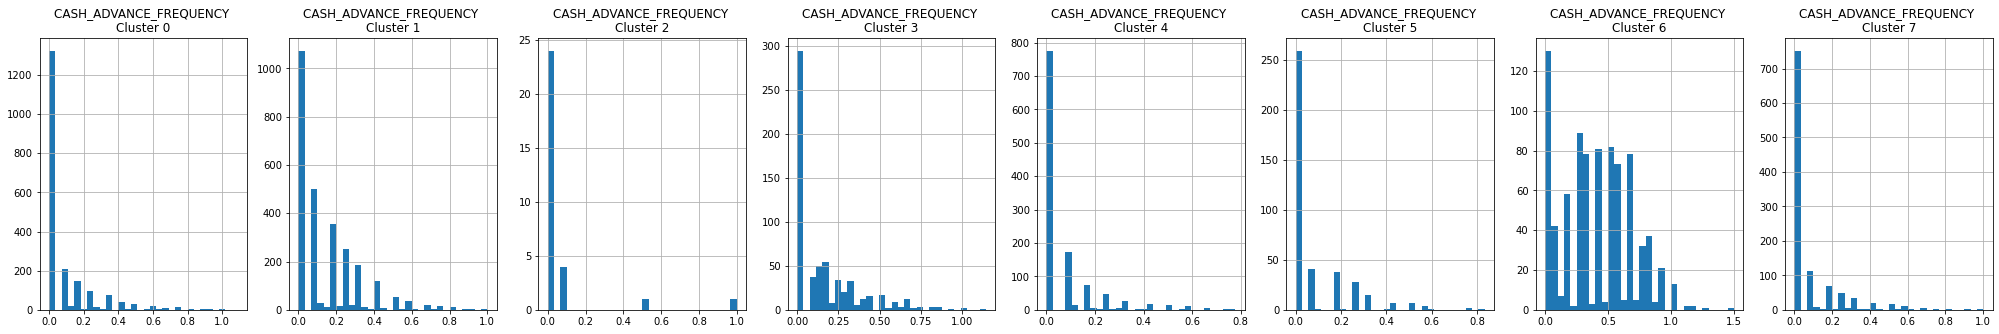

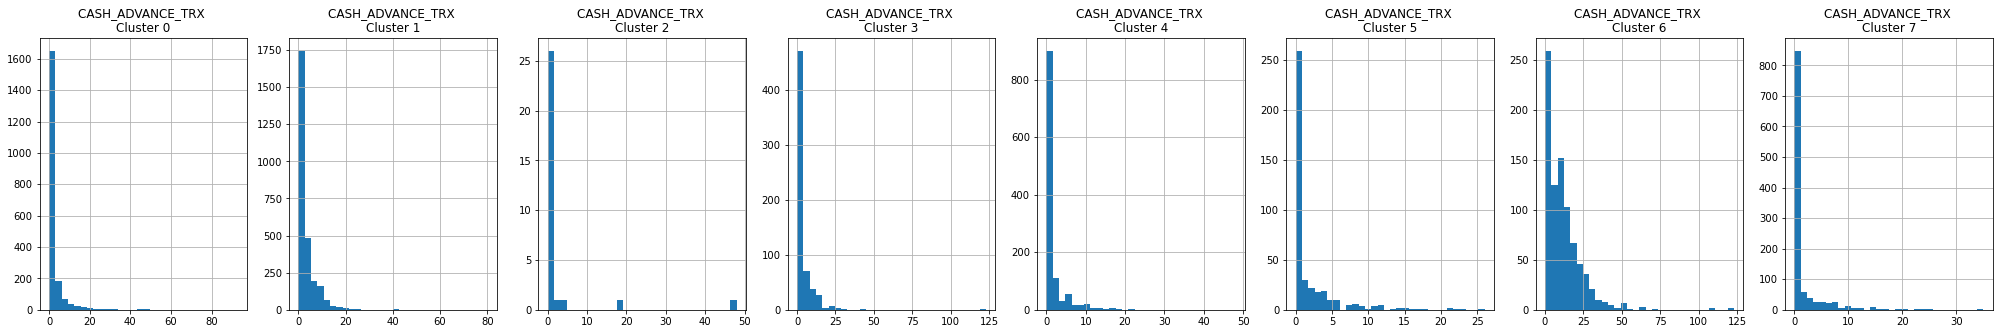

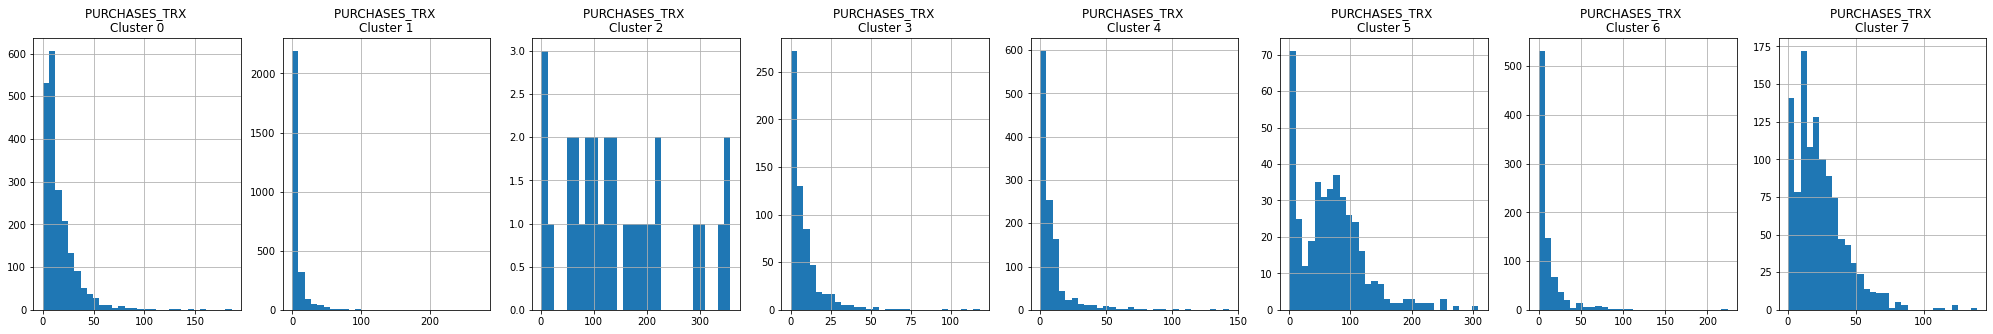

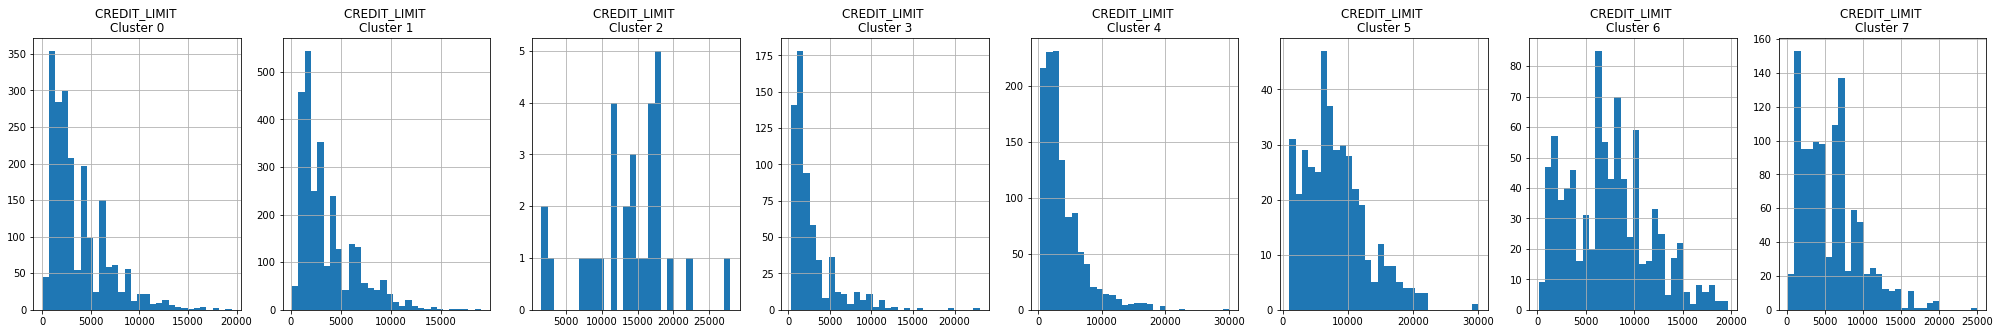

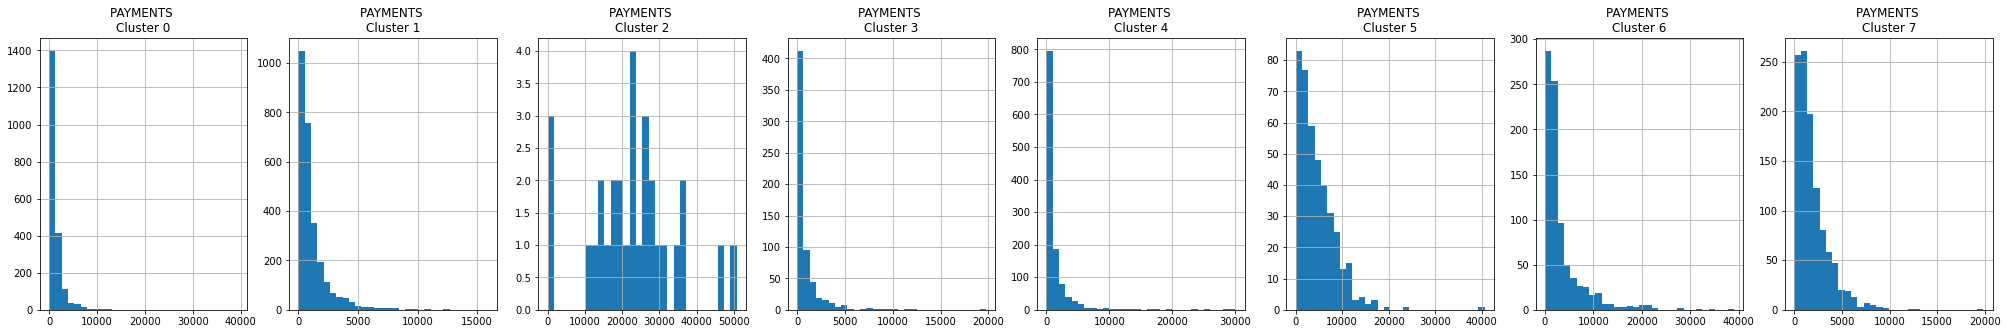

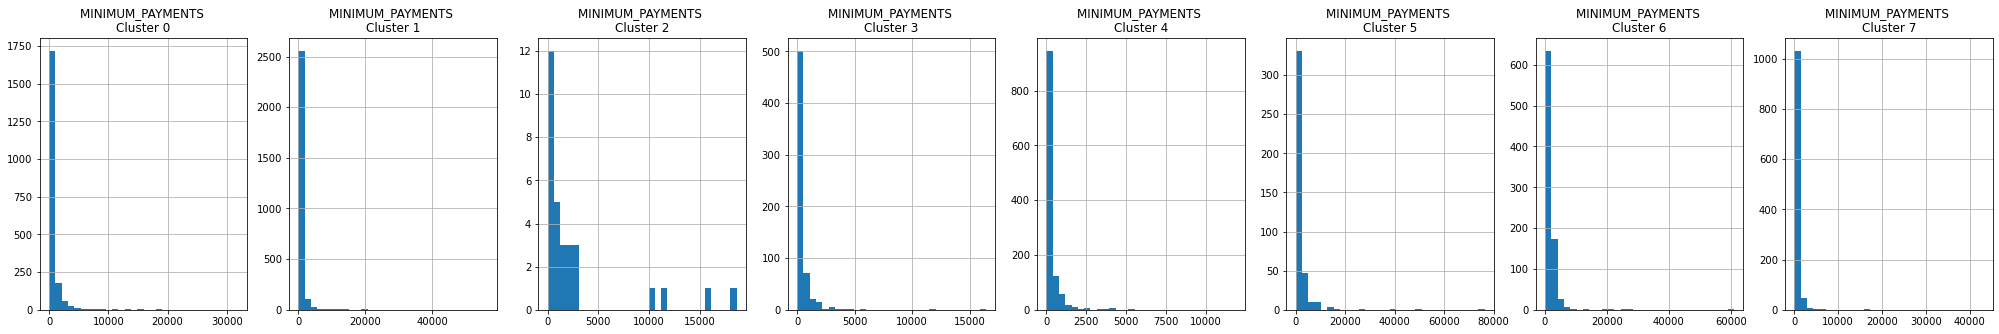

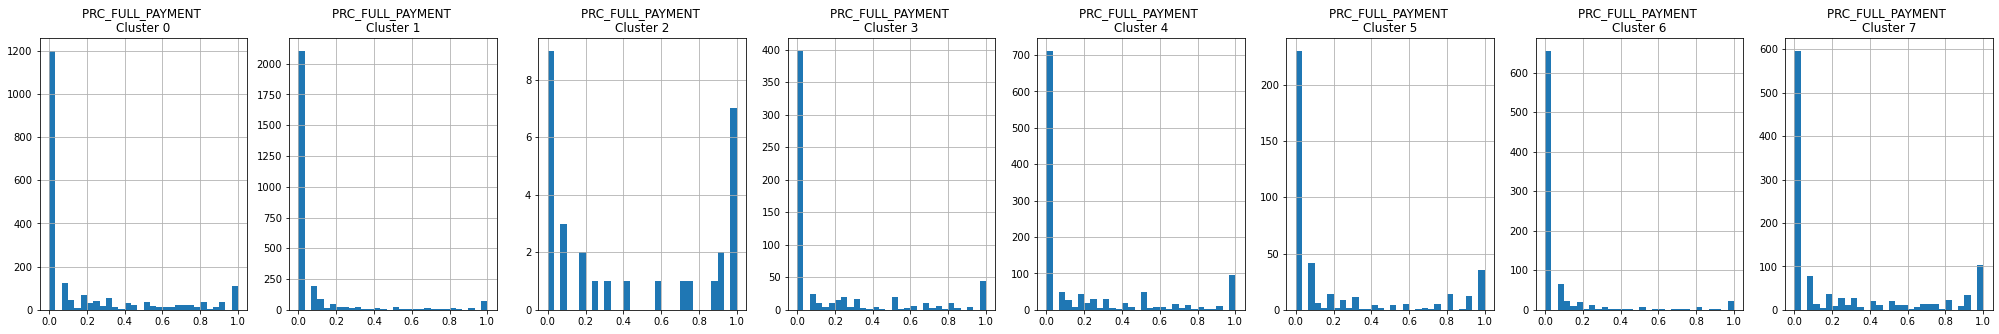

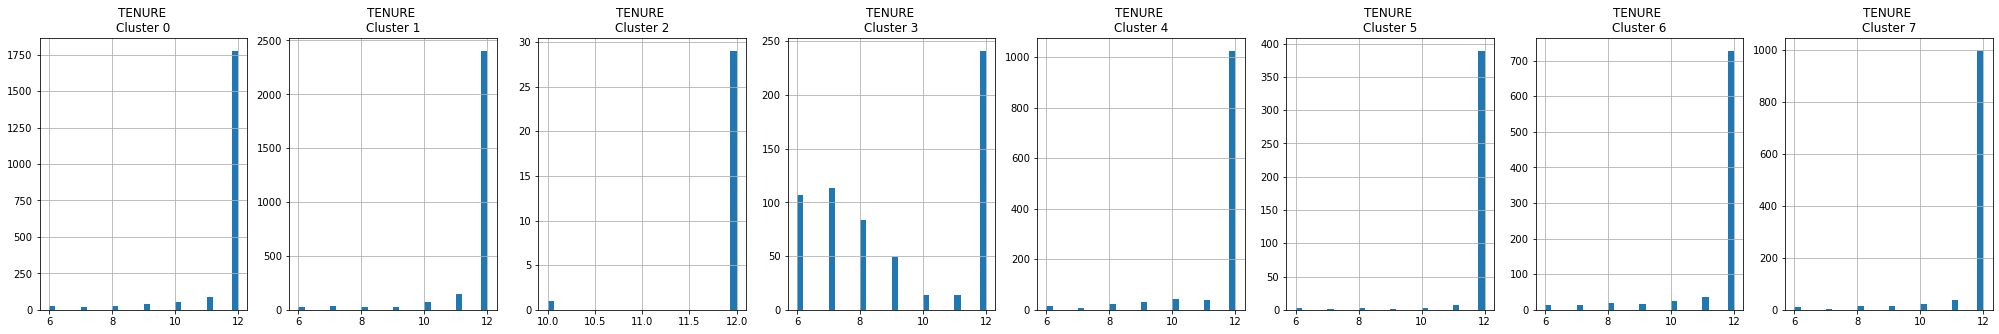

In [29]:
# Plot the histogram of various clusters (one cluster = one column with all features)
for feature in pltdf.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(8):
    plt.subplot(1,8,centroid+1)
    cluster = df_with_centroids[df_with_centroids.centroid==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [31]:
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids.shape

(8, 17)

In [ ]:
# Plot the characteristics of the different clusters using their centroids

# This helps understading the different segments determined with Kmeans

In [33]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids = pd.DataFrame(data=cluster_centroids, columns=[pltdf.columns])
cluster_centroids
# first customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# second customers cluster (Credit purchasers) with high purchase frequency (0.9) who use payment installment facility the most (highest installment frequency 0.83), pay in full whenever possible (second highest Percentage of full payment = 25%) and do not use costly cash advance service
# Third customers cluster (Active cash buyers): Those are active buyers paying in full. Cluster with highest purchase frequency (0.93), second highest purchase transactions and one-off purchases, highest % of payment in full (29%)
# Fourth customer cluster (VIP/Prime): high credit limit $12K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fith customer cluster (low tenure): these are customers with low tenure (7 years), low balance
# Sixth Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance ($104) and second lowest cash advance ($303), Percentage of full payment = 24%
# Seventh customer cluster (one-off): Record-high minimum payments level of nearly 28k$
# Eighth customer cluster (Low activity): these are customers using the less their card (lowest purchase frequency) and with the lowest purchase amount
# note: cluster named by order not using index starting from 0

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   799.380967          0.956353    918.580712       189.516985   
1  1614.945824          0.972886    234.551032       186.852998   
2  5567.142164          0.957273  24957.905000     18186.875667   
3   866.005831          0.795989    388.709518       237.298312   
4   104.597730          0.369729    335.719721       198.031550   
5  3603.541046          0.988110   5831.127340      3410.833498   
6  5115.215125          0.970260    543.908843       336.371192   
7  1213.003165          0.970486   2060.225501      1648.255747   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             729.505289   214.880017            0.886209   
1              47.878516   802.982631            0.143680   
2            6771.029333  1858.844605            0.910556   
3             151.893521  1121.764534            0.410051   
4             137.939483   303.564554            0.267022   
5            2421.771675   588.744136            0.956643   
6             207.657686  5270.774017            0.300729   
7             411.969754   281.275617            0.875255   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.088414                         0.840939   
1                   0.081928                         0.062644   
2                   0.773889                         0.754444   
3                   0.117349                         0.275799   
4                   0.069720                         0.189658   
5                   0.656221                         0.868268   
6                   0.139730                         0.201775   
7                   0.769731                         0.407230   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.040282         0.789916     19.295106   3544.943154   
1               0.158772         3.119256      2.648432   3411.731218   
2               0.083333         3.666667    148.000000  15570.000000   
3               0.196643         3.254019      5.085209   2439.742765   
4               0.030892         0.681626      4.272650   3847.958510   
5               0.075101         1.874384     85.004926   8972.783251   
6               0.523043        16.658796      8.177096   8277.987013   
7               0.052574         1.015483     28.479053   5929.851548   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1099.428099       730.257238         0.244260  11.860603  
1   1020.783500       846.054806         0.020238  11.880744  
2  25178.882690      3475.059479         0.478409  11.933333  
3    597.016369       341.621490         0.158134   7.233119  
4   1143.092370       180.829633         0.235517  11.784081  
5   5455.229667      2367.304416         0.220732  11.970443  
6   4155.322002      2074.333112         0.039415  11.608028  
7   2074.146908       470.270033         0.284387  11.873406

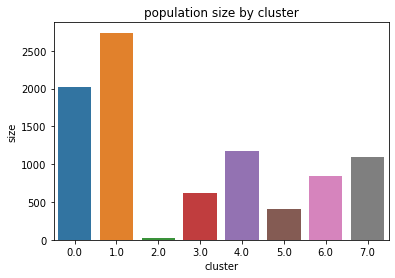

In [34]:
# Check size of each cluster - Are they all representative ?
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()